# Library

In [51]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from feature_engine.datetime import DatetimeFeatures

# Data Preparation

In [52]:
# load properties data
properties = pd.read_csv("properties.csv", index_col = [0])

# data shape
print(properties.shape)

# see the data
properties.head()

(267, 9)


,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [53]:
# rename incorrect column names
properties.rename(columns={"property#" : "property"}, inplace=True)
properties.rename(columns={"﻿id" : "id"}, inplace=True)

In [54]:
# remove extra whitespace in column customerid properties dataset
properties["customerid"] = properties["customerid"].str.strip()

In [55]:
# load customers data
customer = pd.read_csv("customers.csv", index_col=[0])

# data shape
print(customer.shape)

# see data
customer.head()

(162, 12)


,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [56]:
# rename customerid in customer data
customer.rename(columns={"﻿customerid" : "customerid"}, inplace=True)

In [57]:
# merge the two dataset
# using left join

data = properties.merge(customer, how="left", on="customerid")

In [58]:
# data shape
print(data.shape)

# see data
data.head()

(267, 20)


,id,building,date_sale,type,property,area,price,status,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028,Individual,Madalyn,Mercer,6/21/1986,F,USA,California,Home,5.0,No,Website
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027,Individual,Lara,Carrillo,2/24/1983,F,USA,California,Home,5.0,No,Website
2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112,Individual,Donavan,Flowers,12/27/1985,M,USA,California,Home,1.0,Yes,Client
3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160,Individual,Darien,Dorsey,12/27/1985,M,USA,California,Investment,3.0,Yes,Website
4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014,Individual,Alessandra,Perry,5/15/1979,F,USA,California,Home,4.0,No,Agency


In [59]:
# basic information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 266
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 267 non-null    int64  
 1   building           267 non-null    int64  
 2   date_sale          267 non-null    object 
 3   type               267 non-null    object 
 4   property           267 non-null    int64  
 5   area               267 non-null    float64
 6   price              267 non-null    object 
 7   status             267 non-null    object 
 8   customerid         195 non-null    object 
 9   entity             195 non-null    object 
 10  name               195 non-null    object 
 11  surname            195 non-null    object 
 12  birth_date         178 non-null    object 
 13  sex                178 non-null    object 
 14  country            195 non-null    object 
 15  state              181 non-null    object 
 16  purpose            195 non

## Data Types Checking

In [60]:
# see each columns data types
data.dtypes

id                     int64
building               int64
date_sale             object
type                  object
property               int64
area                 float64
price                 object
status                object
customerid            object
entity                object
name                  object
surname               object
birth_date            object
sex                   object
country               object
state                 object
purpose               object
deal_satisfaction    float64
mortgage              object
source                object
dtype: object

Not all columns has correct data types. `date_sale` and `birth_date` supposed to be datetime data type, and `price` suppose to be numerical.

In [61]:
# check value of date columns

print("date_sale unique : \n")
print(data["date_sale"].unique())

print("birth_date unique : \n")
print(data["birth_date"].unique())

date_sale unique : 

['11/1/2005' '10/1/2005' '7/1/2007' '12/1/2007' '11/1/2004' '9/1/2007'
 '1/1/2008' '6/1/2006' '3/1/2006' '10/1/2004' '8/1/2006' '10/1/2007'
 '11/1/2006' '4/1/2007' '10/1/2006' '12/1/2006' '3/1/2005' '3/1/2007'
 '9/1/2006' '1/1/2007' '5/1/2007' '7/1/2006' '5/1/2008' '11/1/2007'
 '1/1/2005' '8/1/2007' '6/1/2005' '2/1/2007' '6/1/2007' '2/1/2005'
 '8/1/2004' '12/1/2008' '5/1/2010' '4/1/2006' '8/1/2005' '6/1/2004'
 '12/1/2005' '3/1/2004' '2/1/2006' '4/1/2005' '5/1/2006' '#NUM!'
 '9/1/2005' '7/1/2005']
birth_date unique : 

['6/21/1986' '2/24/1983' '12/27/1985' '5/15/1979' '12/26/1981' '5/27/1982'
 '6/27/1979' '12/3/1979' '8/17/1976' '9/14/1980' '6/4/1978' '6/10/1977'
 '12/3/1978' '9/14/1978' '12/25/1977' '12/25/1976' '1/8/1977' '3/22/1975'
 '10/5/1975' '2/26/1976' '9/1/1973' '3/27/1974' '8/12/1975' '3/26/1972'
 '9/15/1973' '12/25/1974' '7/18/1974' '2/10/1974' '5/5/1970' '7/11/1972'
 '6/7/1973' '12/15/1973' '8/18/1973' '12/2/1971' '7/17/1973' '5/7/1972'
 '10/30/1969' '5/

one value is incorrect format at `date_sale`. we need to change it. in this case, we convert the value to NaN

In [62]:
# check
data[data["date_sale"] == "#NUM!"]

,id,building,date_sale,type,property,area,price,status,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
178,5052,5,#NUM!,Apartment,52,1769.48,"$532,877.38",-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,1002,1,#NUM!,Apartment,2,1238.58,"$400,865.92",-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,1003,1,#NUM!,Office,3,713.71,"$217,787.71",-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,1008,1,#NUM!,Apartment,8,763.21,"$219,630.90",-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,1019,1,#NUM!,Apartment,19,798.50,"$244,624.87",-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,#NUM!,Apartment,44,1238.58,"$322,610.74",-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,#NUM!,Apartment,47,794.52,"$279,191.26",-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,#NUM!,Apartment,48,1013.27,"$287,996.53",-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,#NUM!,Apartment,50,1074.71,"$365,868.78",-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# replace incorrect format to NaN
data["date_sale"].replace({"#NUM!" : np.nan}, inplace = True)

In [64]:
# recheck
data["date_sale"].unique()

array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', nan, '9/1/2005', '7/1/2005'], dtype=object)

In [65]:
# convert to datetime datatype
data["date_sale"] = pd.to_datetime(data["date_sale"])
data["birth_date"] = pd.to_datetime(data["birth_date"])

In [66]:
# remove dollar sign
# change , with .
data["price"] = data["price"].str.replace(",", "").str[1:]

# convert data type
data["price"] = pd.to_numeric(data["price"])

In [67]:
# check
data["price"]

0      246172.68
1      246331.90
2      209280.91
3      452667.01
4      467083.31
         ...    
262    322610.74
263    279191.26
264    287996.53
265    365868.78
266    199216.40
Name: price, Length: 267, dtype: float64

## Cardinality

In [68]:
# get categorical variables
vars_cat = [col for col in data.columns if data[col].dtypes == "O"]

In [69]:
# check cardinality
for var in vars_cat:
    print(f"number of unique values {var} : {data[var].nunique()}")

number of unique values type : 2
number of unique values status : 2
number of unique values customerid : 162
number of unique values entity : 2
number of unique values name : 159
number of unique values surname : 156
number of unique values sex : 2
number of unique values country : 9
number of unique values state : 9
number of unique values purpose : 2
number of unique values mortgage : 2
number of unique values source : 3


In [70]:
# check unique values 
# var has less than ten unique

for var in [col for col in vars_cat if data[col].nunique() <10]:
    print(f"unique values {var}")
    print(data[var].unique())
    print()

unique values type
['Apartment' 'Office']

unique values status
[' Sold ' '-']

unique values entity
['Individual' nan 'Company']

unique values sex
['F' 'M' nan]

unique values country
['USA' 'UK' 'USA ' 'Belgium' 'Russia' 'Denmark' 'Germany' 'Mexico'
 'Canada' nan]

unique values state
['California' 'Virginia' 'Arizona' 'Oregon' 'Nevada' 'Colorado' 'Utah' nan
 'Kansas' 'Wyoming']

unique values purpose
['Home' 'Investment' nan]

unique values mortgage
['No' 'Yes' nan]

unique values source
['Website' 'Client' 'Agency' nan]



In [71]:
# remove extra whitespace in status and country

data["status"] = data["status"].str.strip()
data["country"] = data["country"].str.strip()

## Missing Value

In [72]:
# check proportion of NaN
data.isna().mean()

id                   0.000000
building             0.000000
date_sale            0.269663
type                 0.000000
property             0.000000
area                 0.000000
price                0.000000
status               0.000000
customerid           0.269663
entity               0.269663
name                 0.269663
surname              0.269663
birth_date           0.333333
sex                  0.333333
country              0.269663
state                0.322097
purpose              0.269663
deal_satisfaction    0.269663
mortgage             0.269663
source               0.269663
dtype: float64

In [73]:
# recheck data types
data.dtypes

id                            int64
building                      int64
date_sale            datetime64[ns]
type                         object
property                      int64
area                        float64
price                       float64
status                       object
customerid                   object
entity                       object
name                         object
surname                      object
birth_date           datetime64[ns]
sex                          object
country                      object
state                        object
purpose                      object
deal_satisfaction           float64
mortgage                     object
source                       object
dtype: object

# Descriptive Statistics

In [74]:
# numerical descriptive
data.describe()

,id,building,property,area,price,deal_satisfaction
count,267.000000,267.000000,267.000000,267.000000,267.000000,195.000000
mean,2975.142322,2.947566,27.580524,936.221311,281171.901386,3.600000
std,1392.197474,1.391794,15.361437,284.894858,89119.121005,1.340872
min,1002.000000,1.000000,1.000000,410.710000,117564.070000,1.000000
25%,2015.500000,2.000000,14.500000,756.210000,217553.055000,3.000000
50%,3024.000000,3.000000,28.000000,798.280000,249075.660000,4.000000
75%,4031.500000,4.000000,40.000000,1121.950000,326964.855000,5.000000
max,5052.000000,5.000000,59.000000,1942.500000,538271.740000,5.000000


In [75]:
# categorical descriptive
data.describe(include="O")

,type,status,customerid,entity,name,surname,sex,country,state,purpose,mortgage,source
count,267,267,195,195,195,195,178,195,181,195,195,195
unique,2,2,162,2,159,156,2,8,9,2,2,3
top,Apartment,Sold,C0174,Individual,Marleez,Co,M,USA,California,Home,No,Website
freq,259,195,9,178,9,17,108,177,120,119,133,119


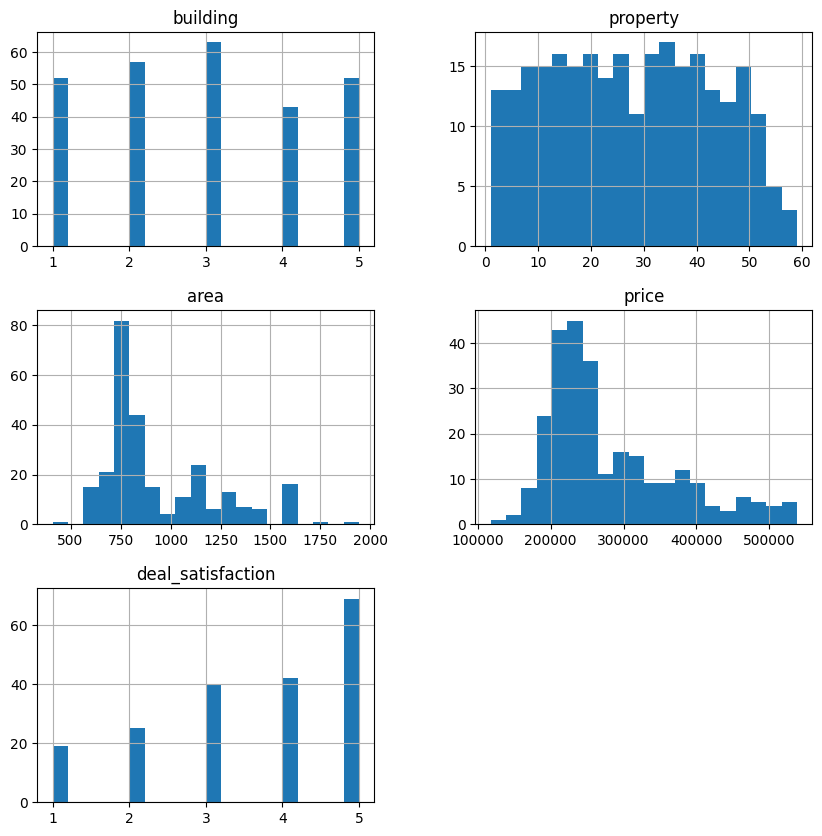

In [76]:
# numerical variables
vars_num = [col for col in data.describe().columns if col != "id"]

# distribution of numerical values
data[vars_num].hist(figsize = (10, 10), bins = 20)
plt.show()

## Sales Performance by Building Type

In [77]:
# get data sold only
df_sold = data[data["status"] == "Sold"]

In [78]:
df_sold["type"].value_counts(normalize = True)

Apartment    0.964103
Office       0.035897
Name: type, dtype: float64

In [79]:
df_sold["building"].value_counts(normalize = True)

2    0.276923
3    0.271795
1    0.235897
4    0.117949
5    0.097436
Name: building, dtype: float64

## Sales Performance by Country and State

In [80]:
df_sold["country"].value_counts(normalize = True)

USA        0.907692
Canada     0.035897
Russia     0.020513
UK         0.010256
Belgium    0.010256
Denmark    0.005128
Germany    0.005128
Mexico     0.005128
Name: country, dtype: float64

In [81]:
df_sold["state"].value_counts(normalize = True)

California    0.662983
Nevada        0.093923
Arizona       0.060773
Oregon        0.060773
Colorado      0.060773
Utah          0.027624
Virginia      0.022099
Kansas        0.005525
Wyoming       0.005525
Name: state, dtype: float64

## Breakdown by Building

In [82]:
data.groupby(by = "building")[["area", "price", "deal_satisfaction"]].mean()

,area,price,deal_satisfaction
building,,,
1,928.038846,275143.242500,3.630435
2,943.891930,286661.848246,3.518519
3,927.852381,280451.255556,3.566038
4,974.720930,290239.515581,3.869565
5,914.298654,274557.604615,3.526316


# Data Analysis

In [83]:
# get age data
data["age"] = (data["date_sale"] - data["birth_date"]).astype('<m8[Y]')

# binning age data
lower_limit = [19, 25, 31, 36, 42, 48, 54, 59, 65, 71, 76]
age_bin = ["19-25", "25-31", "31-36", "36-42", "42-48", "48-54", "54-59", "59-65", "65-71", "71-76"]

# get bin age
data["age_bin"] = pd.cut(data["age"], bins = lower_limit, labels=age_bin, include_lowest=True)

# see data
data[["age", "age_bin"]]

,age,age_bin
0,19.0,19-25
1,22.0,19-25
2,21.0,19-25
3,21.0,19-25
4,25.0,19-25
...,...,...
262,NaN,NaN
263,NaN,NaN
264,NaN,NaN
265,NaN,NaN


In [97]:
# redefine df_sold
df_sold = data[data["status"] == "Sold"]

df_sold["age_bin"].value_counts(normalize = True)

36-42    0.179775
42-48    0.168539
54-59    0.134831
31-36    0.129213
25-31    0.095506
48-54    0.095506
59-65    0.061798
65-71    0.061798
19-25    0.050562
71-76    0.022472
Name: age_bin, dtype: float64

# Data Visualization

In [85]:
# deal satisfaction by country

df = data.groupby(by = "country")[["deal_satisfaction"]].mean().sort_values(by = "deal_satisfaction", ascending = False)
df

,deal_satisfaction
country,
Canada,5.000000
Germany,5.000000
UK,4.000000
USA,3.581921
Belgium,3.000000
Mexico,3.000000
Russia,2.500000
Denmark,1.000000


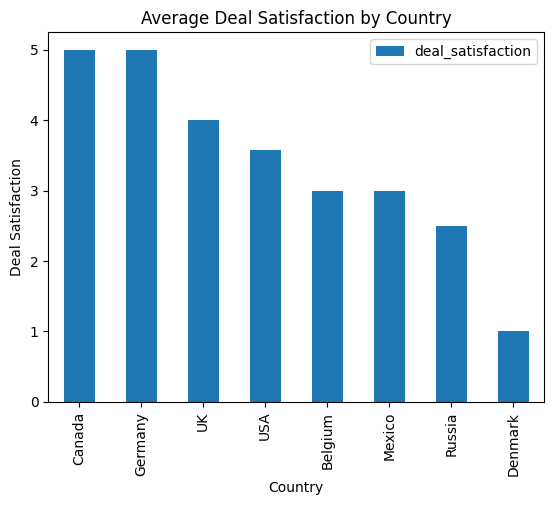

In [86]:
# visualization

df.plot(kind = "bar")
plt.title("Average Deal Satisfaction by Country")
plt.ylabel("Deal Satisfaction")
plt.xlabel("Country")
plt.show()

## revenue over a time

In [87]:
# check min date and max date
print(data["date_sale"].min(), data["date_sale"].max())

2004-03-01 00:00:00 2010-05-01 00:00:00


In [88]:
# get columns date_sale and price only
df = data[["date_sale", "price"]]
df = df.set_index("date_sale")

# groupby sum of price
df = df.resample("M").sum()
df.head()

,price
date_sale,
2004-03-31,697655.03
2004-04-30,0.00
2004-05-31,0.00
2004-06-30,606778.27
2004-07-31,0.00


In [89]:
# extract date
extractor = DatetimeFeatures(variables="index", missing_values="ignore")
df = extractor.fit_transform(df)

# see data
df.head()

,price,month,year,day_of_week,day_of_month,hour,minute,second
date_sale,,,,,,,,
2004-03-31,697655.03,3,2004,2,31,0,0,0
2004-04-30,0.00,4,2004,4,30,0,0,0
2004-05-31,0.00,5,2004,0,31,0,0,0
2004-06-30,606778.27,6,2004,2,30,0,0,0
2004-07-31,0.00,7,2004,5,31,0,0,0


In [90]:
# melted
df = df.melt(id_vars=["month", "year"], value_vars="price")
df.head()

,month,year,variable,value
0,3,2004,price,697655.03
1,4,2004,price,0.00
2,5,2004,price,0.00
3,6,2004,price,606778.27
4,7,2004,price,0.00


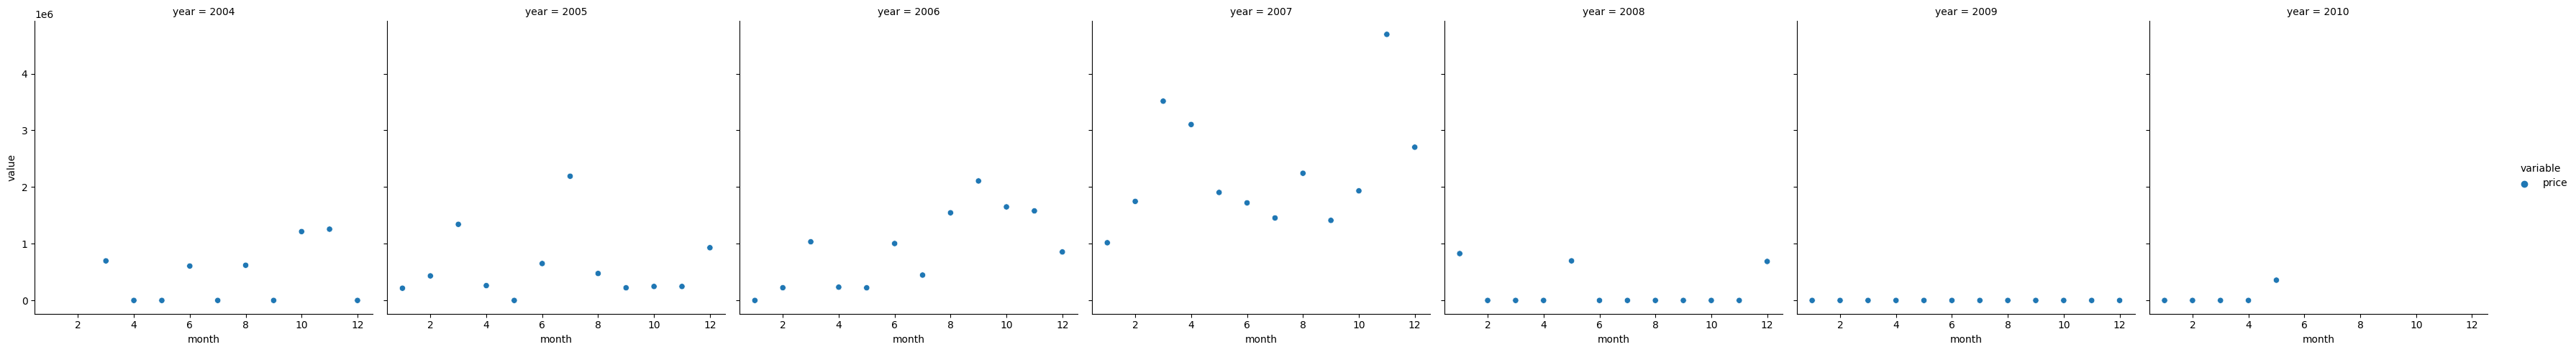

In [91]:
# visualize
sns.relplot(data = df, x = "month", y = "value", hue = "variable", col = "year")
plt.show()